In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing

In [30]:
#load data
df = pd.read_csv('all_books.csv')
print ("Size of dataset is {}".format(df.shape[0]))
df.head(3)

Size of dataset is 11636


,book_id_title,book_id,book_title,book_series,book_series_uri,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,description,num_ratings,num_reviews,average_rating,rating_distribution
0,3721,3721,Stranger Than Fiction: An Independent Investig...,NaN,NaN,0999215736,9780999215739,NaN,Albert D. Pastore,184.0,[],{},"The true story behind 9-11, delivered by a met...",8,1,4.00,"{'5 Stars': 3, '4 Stars': 2, '3 Stars': 3, '2 ..."
1,2833,2833,The Life and Death of Carthage; A Survey of Pu...,NaN,NaN,0800847504,9780800847500,NaN,Gilbert Charles Picard,362.0,['History'],"{'to-read': 17, 'history': 2, 'world': 1, 'rom...",NaN,7,0,4.14,"{'5 Stars': 1, '4 Stars': 6, '3 Stars': 0, '2 ..."
2,729,729,"The Ultimate Guitar Chord Big Book: Over 100,0...",NaN,NaN,isbn not found,isbn13 not found,NaN,Don Latarski,404.0,[],{},The Ultimate Guitar Chord Big Book is the abso...,0,0,0.00,"{'5 Stars': 0, '4 Stars': 0, '3 Stars': 0, '2 ..."


In [31]:
#check genres distributions and remove empty rows
df = df.dropna(subset=['genres','description','book_title']).reset_index(drop=True)
df['genres'] = df['genres'].str.replace('[','').str.replace(']','').str.replace("'",'')
df = df[df['genres'].map(lambda d: len(d)) > 0].reset_index(drop = True)
all_genres = set()
df['original_label'] = [-1 for _ in range(len(df))]
for i in range(len(df)):
    g = df['genres'][i].split(',')
    for ele in g:
        ele = ele.split('>')[0].lstrip().rstrip()
        all_genres.add(ele)
print ('There are total of {} genres'.format(len(all_genres)))

There are total of 267 genres


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
df.head(3)

,book_id_title,book_id,book_title,book_series,book_series_uri,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,description,num_ratings,num_reviews,average_rating,rating_distribution,original_label
0,683,683,Natural Capitalism,NaN,NaN,0316353167,9780316353168,1999.0,Paul Hawken,416.0,"Nonfiction, Economics, Environment, Environmen...","{'to-read': 4251, 'currently-reading': 150, 'n...",This groundbreaking book reveals how today's g...,1771,146,3.99,"{'5 Stars': 579, '4 Stars': 721, '3 Stars': 36...","[Nonfiction, Economics, Environment, Enviro..."
1,6173,6173,The Periodic Table,NaN,NaN,0805210415,9780805210415,1975.0,Primo Levi,194.0,"Nonfiction, Science, History, Autobiography > ...","{'to-read': 17150, 'currently-reading': 635, '...","A collection of memoirs by Primo Levi, publish...",13035,959,4.15,"{'5 Stars': 5535, '4 Stars': 4877, '3 Stars': ...","[Nonfiction, Science, History, Autobiograph..."
2,2999,2999,The Secret Garden,NaN,NaN,0517189607,9780517189603,1910.0,Frances Hodgson Burnett,272.0,"Classics, Fiction, Childrens, Young Adult, His...","{'to-read': 415404, 'classics': 17679, 'curren...",Ten-year-old Mary comes to live in a lonely ho...,952751,20578,4.13,"{'5 Stars': 409185, '4 Stars': 325504, '3 Star...","[Classics, Fiction, Childrens, Young Adult,..."


In [34]:
df['original_label'][0]

['Nonfiction',
 ' Economics',
 ' Environment',
 ' Environment > Sustainability',
 ' Business',
 ' Politics',
 ' Biology > Ecology',
 ' Environment > Green',
 ' Science',
 ' Environment > Nature']

In [73]:
#clean up genres: take the first genres as the label, clean up text 
def get_first(genres):
    clean_genres = []
    for genre in genres:
        g = genre.split('>')[0].lstrip().rstrip()
        clean_genres.append(g)
    return clean_genres
df['original_label'] = df['genres'].apply(lambda x:x.split(','))
df['original_label'] = df['original_label'].apply(get_first)
#df['original_label'][i] = df['original_label'][i].apply(lambda x:x.split('>')[0].lstrip().rstrip())
df['label'] = df['original_label']

#combine book title and description together as the training data
# disable chained assignments
pd.options.mode.chained_assignment = None 
df['book'] = (df['book_title'].astype(str) +' ' + df['description']).apply(lambda row:row.strip())

In [74]:
df = df[['book','label']]

In [75]:
all_genres = {}
for label in df['label']:
    for l in label:
        if l in all_genres:
            all_genres[l] += 1
        else:
            all_genres[l] = 1

top_20 = {k: v for k, v in sorted(all_genres.items(), key=lambda item: -1*item[1])}
top_20 = {A:N for (A,N) in [x for x in top_20.items()][:20]}

In [76]:
top_20

{'Literature': 4700,
 'Fiction': 4464,
 'Classics': 3167,
 'Nonfiction': 3076,
 'Historical': 2775,
 'Novels': 2178,
 'Fantasy': 2051,
 'Childrens': 2030,
 'Cultural': 1846,
 'Mystery': 1733,
 'History': 1574,
 'Biography': 1256,
 'Religion': 1162,
 'European Literature': 1148,
 'Thriller': 1085,
 'Romance': 1059,
 'Humor': 1039,
 'Contemporary': 1012,
 'Young Adult': 1010,
 'Philosophy': 975}

In [78]:
genres = ['Literature','Fiction','Classics','Nonfiction','Historical','Novels','Fantasy','Childrens','Cultural','Mystery',
         'History','Biography','Religion','European Literature','Thriller','Romance','Humor','Contemporary','Young Adult',
         'Philosophy']
for g in genres:
    df['genres_{}'.format(g)] = df['label'].apply(lambda x: g in x)

In [79]:
df['label'][0]

['Nonfiction',
 'Economics',
 'Environment',
 'Environment',
 'Business',
 'Politics',
 'Biology',
 'Environment',
 'Science',
 'Environment']

In [80]:
#encode genres to get labels
all_genres = list(all_genres)
le = preprocessing.LabelEncoder()
le.fit(all_genres)
le.classes_

array(['40k', 'Academic', 'Action', 'Adult', 'Adult Fiction', 'Adventure',
       'Aeroplanes', 'Africa', 'African Literature', 'Alcohol',
       'American', 'American Civil War', 'American History',
       'American Revolution', 'Anarchism', 'Animals', 'Anthologies',
       'Anthropology', 'Apocalyptic', 'Archaeology', 'Architecture',
       'Art', 'Art and Photography', 'Artificial Intelligence',
       'Asian Literature', 'Audiobook', 'Autobiography', 'Aviation',
       'Biblical', 'Biblical Fiction', 'Biography', 'Biography Memoir',
       'Biology', 'Book Club', 'Buddhism', 'Buisness', 'Business',
       'Canon', 'Cartography', 'Category Romance', 'Childrens',
       'Christian', 'Christian Fiction', 'Christianity', 'Church',
       'Cities', 'Classics', 'Comedy', 'Comics', 'Comics Manga',
       'Complementary Med...', 'Computer Science', 'Computers',
       'Conservation', 'Contemporary', 'Contemporary Romance', 'Couture',
       'Crafts', 'Crime', 'Criticism', 'Cultural', 'Cult

In [19]:
df['label'] = le.transform(df['original_label'])

In [20]:
#combine book title and description together as the training data
# disable chained assignments
pd.options.mode.chained_assignment = None 
df['book'] = (df['book_title'].astype(str) +' ' + df['description']).apply(lambda row:row.strip())

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


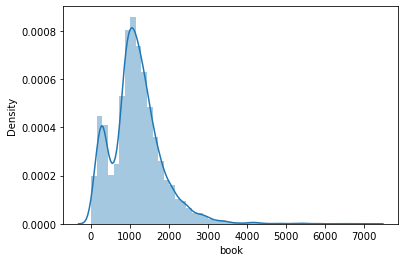

In [21]:
#check distribution of book length
length_dist = df['book'].apply(len)
ax = sns.distplot(length_dist)

In [83]:
#save files
final_df.to_csv("final_df.csv")

In [84]:
final_df.head(3)

,book,label,genres_Literature,genres_Fiction,genres_Classics,genres_Nonfiction,genres_Historical,genres_Novels,genres_Fantasy,genres_Childrens,...,genres_History,genres_Biography,genres_Religion,genres_European Literature,genres_Thriller,genres_Romance,genres_Humor,genres_Contemporary,genres_Young Adult,genres_Philosophy
0,Natural Capitalism This groundbreaking book re...,"[Nonfiction, Economics, Environment, Environme...",False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,The Periodic Table A collection of memoirs by ...,"[Nonfiction, Science, History, Autobiography, ...",False,False,True,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
2,The Secret Garden Ten-year-old Mary comes to l...,"[Classics, Fiction, Childrens, Young Adult, Hi...",True,True,True,False,True,False,True,True,...,False,False,False,False,False,False,False,False,True,False
